# Import backage

In [1]:
import sys
sys.path.append("../..")
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import random
%matplotlib inline

import torch
from torch import nn
from torch import distributions
from torch.nn.parameter import Parameter
from importlib import reload

from models.models_new import Renorm_Dynamic
from dynamic_models_sis_new import Simple_Spring_Model
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from datetime import datetime
t0 = datetime.now()


use_cuda = torch.cuda.is_available()
device = torch.device('cuda:0') if use_cuda else torch.device('cpu')
device

device(type='cuda', index=0)

# Generate data

In [2]:
mul_batch_size = [0,5000,3000,1000]#[0,10,4500,1500]
sigma = 0.03
rou = -0.5
steps = 7

seed = 2050
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
spring = Simple_Spring_Model(device=device)
test_data = spring.generate_multistep_sir(size_list=[500,500], steps=10, sigma=sigma, rou=rou,lam=1,miu=0.5) #sir
train_data = spring.generate_multistep_sir(size_list=mul_batch_size, steps=steps, sigma=sigma,rou=rou,lam=1,miu=0.5)

# Train NIS

In [3]:
import models_new
reload(models_new)
from models_new import Renorm_Dynamic
from models_new import train
sz = 4
scale = 2
L = 1
mae2_w = 3
T_total = 30001
eis_nis, term1s_nis, term2s_nis, losses_nis, MAEs_mstep_nis = train(train_data=train_data, test_data=test_data, sigma=sigma, rou=rou, sz=sz, scale=scale, L=L, mae2_w=mae2_w, T2=T_total,framework='nis')


check point-------o_0-> 14:12:13.293360; lasting 0:00:00.722046 seconds
Epoch: 0
Train loss: CommonNet= 0.4368
dEI: CommonNet= 0.4412
term1: CommonNet= -0.5416
term2: CommonNet= 1.4240
------------------------------------------------------------------------------------------------------------------------
check point-------o_1-> 14:12:20.317282; lasting 0:00:07.023922 seconds
check point-------o_0-> 14:12:28.038338; lasting 0:00:07.721056 seconds
Epoch: 500
Train loss: CommonNet= 0.0769
dEI: CommonNet= 0.9075
term1: CommonNet= 0.5040
term2: CommonNet= 1.3110
------------------------------------------------------------------------------------------------------------------------
check point-------o_1-> 14:12:36.568750; lasting 0:00:08.530412 seconds
check point-------o_0-> 14:12:44.830717; lasting 0:00:08.261967 seconds
Epoch: 1000
Train loss: CommonNet= 0.0349
dEI: CommonNet= 1.4894
term1: CommonNet= 1.6393
term2: CommonNet= 1.3394
--------------------------------------------------------

# Train NIS+

In [ ]:
import models_new
reload(models_new)
from models_new import Renorm_Dynamic
from models_new import train
eis_nisp, term1s_nisp, term2s_nisp, losses_nisp, MAEs_mstep_nisp = train(train_data=train_data, test_data=test_data, sigma=sigma, rou=rou, sz=sz, scale=scale, L=L, mae2_w=mae2_w, T2=T_total,framework='nis+')

check point-------o_0-> 14:30:32.819054; lasting 0:00:00.046177 seconds
Epoch: 0
Train loss: CommonNet= 0.4836
dEI: CommonNet= 0.4410
term1: CommonNet= -0.5409
term2: CommonNet= 1.4228
------------------------------------------------------------------------------------------------------------------------
check point-------o_1-> 14:30:39.796175; lasting 0:00:06.977121 seconds
check point-------o_0-> 14:30:52.164403; lasting 0:00:12.368228 seconds
Epoch: 500
Train loss: CommonNet= 0.0798
dEI: CommonNet= 0.9139
term1: CommonNet= 0.5121
term2: CommonNet= 1.3157
------------------------------------------------------------------------------------------------------------------------
check point-------o_1-> 14:31:00.568422; lasting 0:00:08.404019 seconds
check point-------w_0-> 14:31:10.714494; lasting 0:00:10.146072 seconds
check point-------w_1-> 14:31:10.726514; lasting 0:00:00.012020 seconds
check point-------w_2-> 14:35:20.856188; lasting 0:04:10.129674 seconds
check point-------w_3-> 14:

# Results

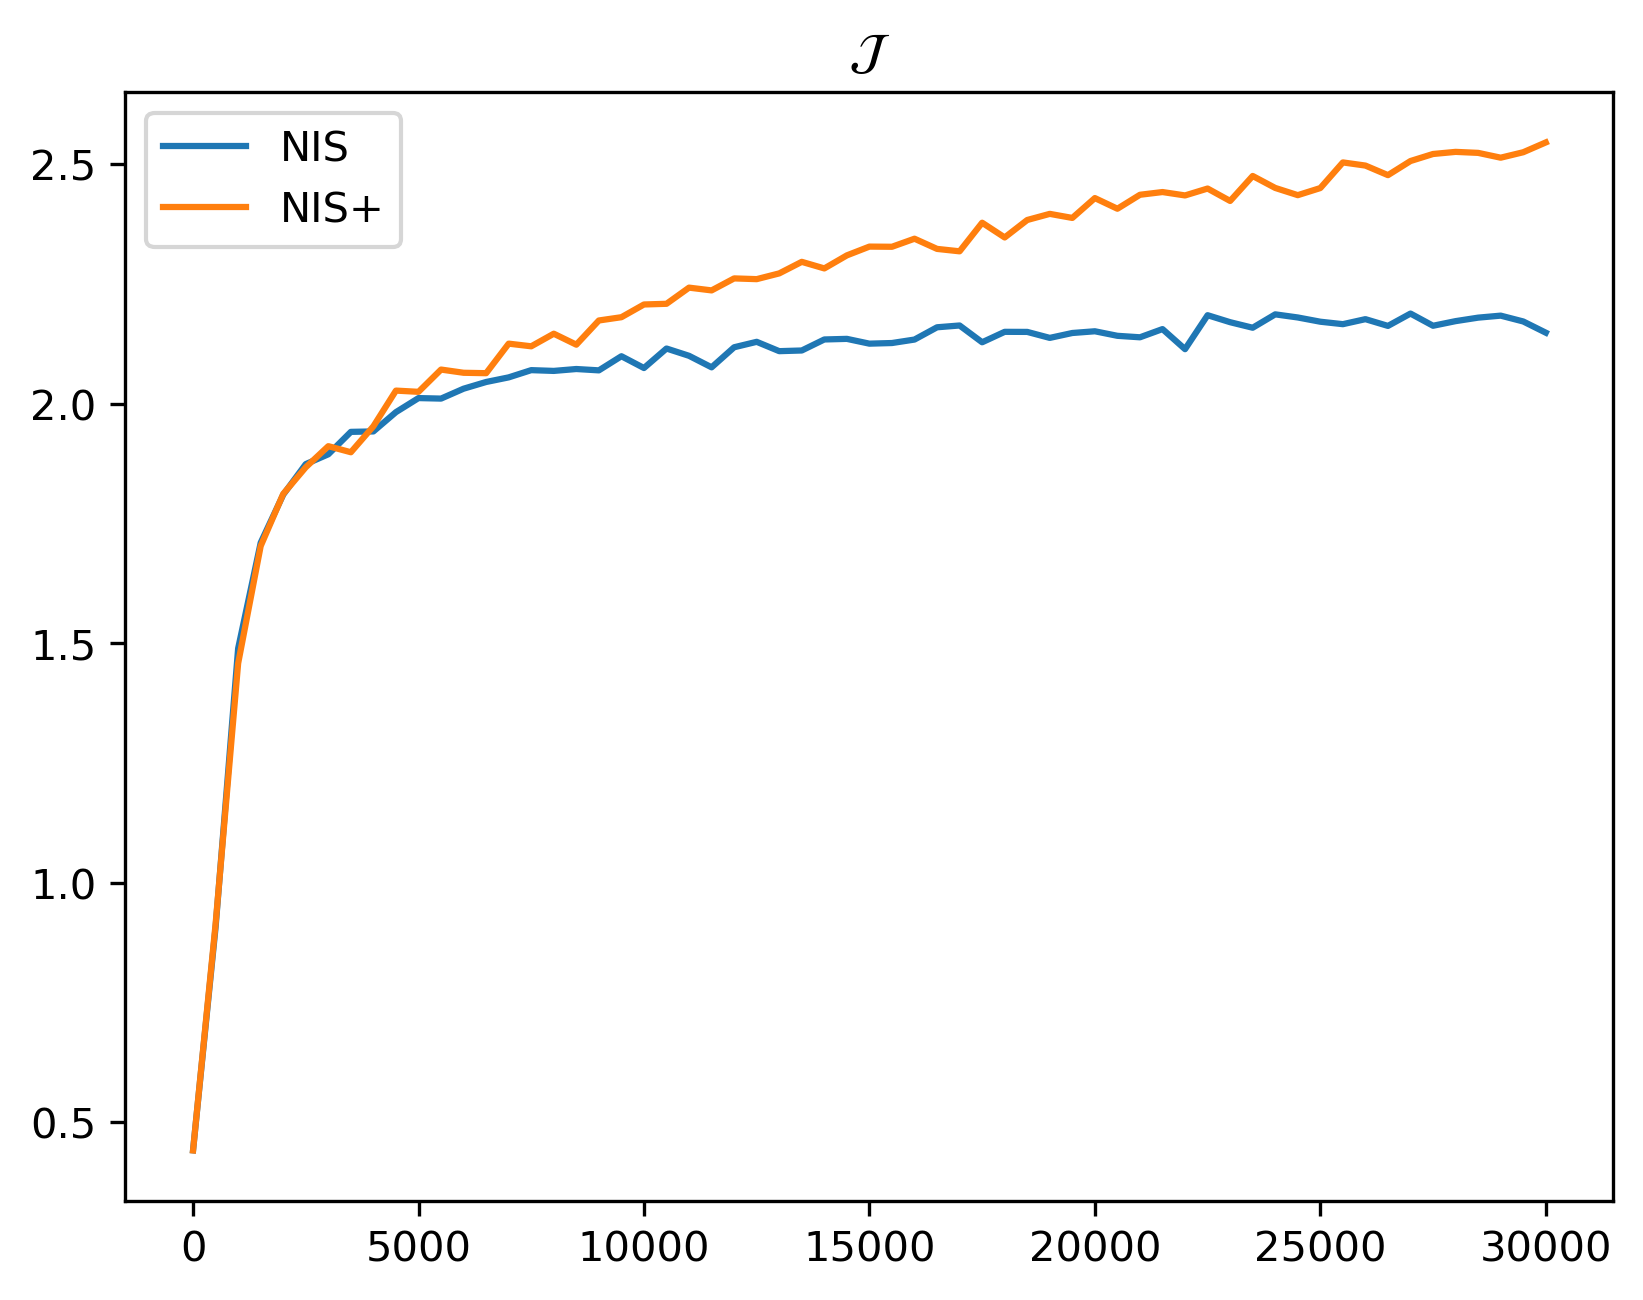

In [7]:
plt.figure(dpi=300)
timeseries = np.arange(len(eis_nis))*500
plt.plot(timeseries, eis_nis, label='NIS')
plt.plot(timeseries, eis_nisp, label='NIS+')
plt.title(r'$\mathcal{J}$')
plt.legend()
plt.show()

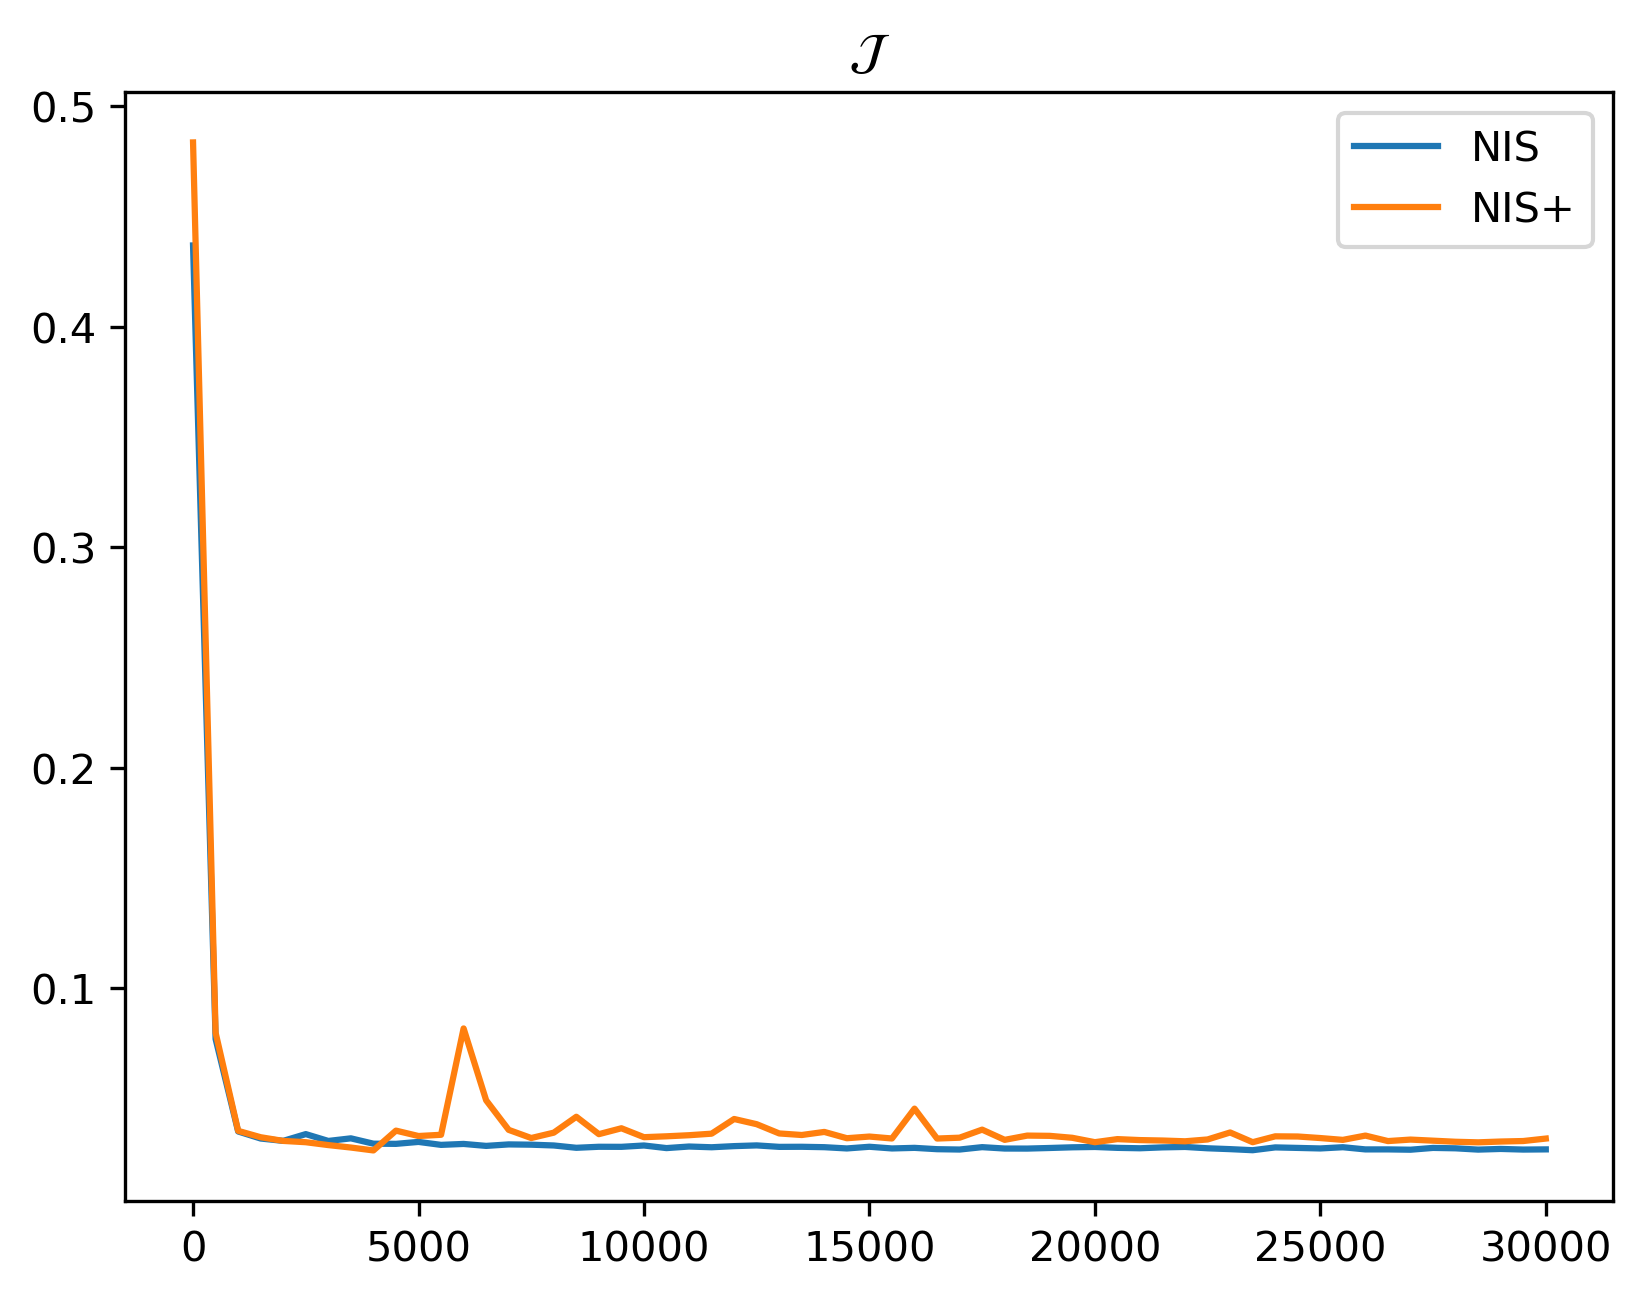

In [8]:
plt.figure(dpi=300)
timeseries = np.arange(len(eis_nis))*500
plt.plot(timeseries, losses_nis, label='NIS')
plt.plot(timeseries, losses_nisp, label='NIS+')
plt.title(r'$\mathcal{J}$')
plt.legend()
plt.show()

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

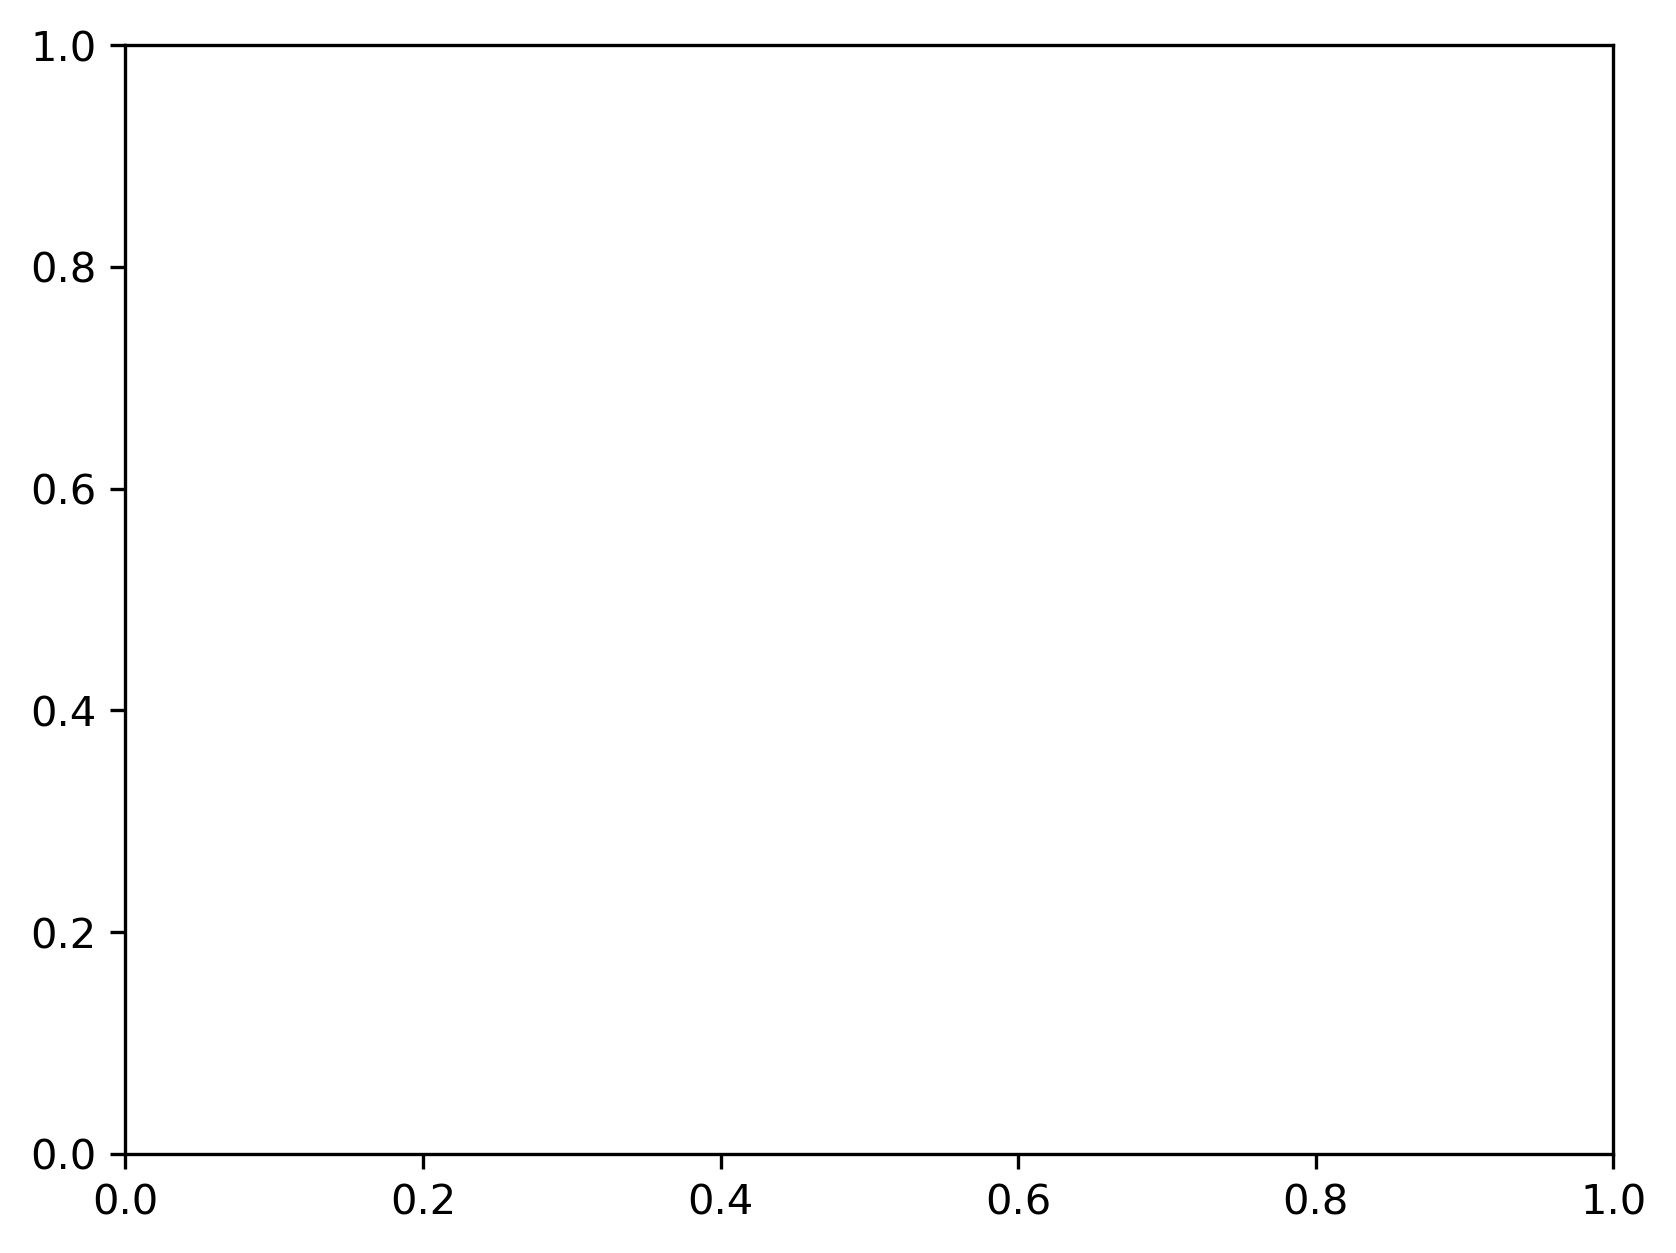

In [9]:
plt.figure(dpi=300)
timeseries = np.arange(len(eis_nis))*500
plt.plot(timeseries, MAEs_mstep_nis, label='NIS')
plt.plot(timeseries, MAEs_mstep_nisp, label='NIS+')
plt.title(r'$\mathcal{J}$')
plt.legend()
plt.show()